In [19]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Flatten, Dense, Embedding, LSTM, Bidirectional, Dropout
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras import preprocessing

import matplotlib.pyplot as plt

In [20]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [21]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [22]:
NUM_WORDS = 1000
MAX_LEN = 50
NUM_FEATURES = 6

In [23]:
# находим 1000 наиболее встречающихся слов и индексируем их

tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(df_train['comment_text'])


# получаем последовательность индексов из исходных комментариев

sequences_train = tokenizer.texts_to_sequences(df_train['comment_text'])
sequences_test = tokenizer.texts_to_sequences(df_test['comment_text'])

In [24]:
# берем только первые NUM_WORDS слов комментария

x_train = preprocessing.sequence.pad_sequences(sequences_train, maxlen=MAX_LEN)
x_test = preprocessing.sequence.pad_sequences(sequences_test, maxlen=MAX_LEN)

ans_columns = df_train.columns[2:]
y_train = df_train[ans_columns].values

In [25]:
# строим однослойную линейную модель

model = Sequential()
model.add(Embedding(NUM_WORDS + 1, 16, input_length=MAX_LEN))
# model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(NUM_FEATURES, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [26]:

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [27]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
1995/1995 [==============================] - 9s 4ms/step - loss: 0.0927 - acc: 0.9917 - val_loss: 0.0693 - val_acc: 0.9941
Epoch 2/10
1995/1995 [==============================] - 7s 4ms/step - loss: 0.0685 - acc: 0.9940 - val_loss: 0.0716 - val_acc: 0.9941
Epoch 3/10
1995/1995 [==============================] - 7s 3ms/step - loss: 0.0666 - acc: 0.9940 - val_loss: 0.0650 - val_acc: 0.9941
Epoch 4/10
1995/1995 [==============================] - 7s 4ms/step - loss: 0.0655 - acc: 0.9942 - val_loss: 0.0689 - val_acc: 0.9941
Epoch 5/10
1995/1995 [==============================] - 7s 4ms/step - loss: 0.0647 - acc: 0.9942 - val_loss: 0.0648 - val_acc: 0.9941
Epoch 6/10
1995/1995 [==============================] - 7s 3ms/step - loss: 0.0641 - acc: 0.9942 - val_loss: 0.0655 - val_acc: 0.9941
Epoch 7/10
1995/1995 [==============================] - 7s 4ms/step - loss: 0.0635 - acc: 0.9942 - val_loss: 0.0639 - val_acc: 0.9941
Epoch 8/10
1995/1995 [==============================] - 7s 4ms

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            16016     
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 20,438
Trainable params: 20,438
Non-trainable params: 0
_________________________________________________________________


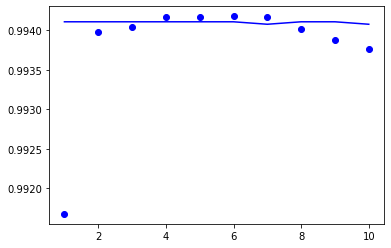

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

In [30]:
results = model.predict(x_test, batch_size=64)

In [31]:
results

array([[9.7857076e-01, 1.2334431e-01, 8.9805079e-01, 1.4636797e-02,
        7.9250783e-01, 8.9399040e-02],
       [9.7430628e-03, 6.5970940e-05, 2.2959295e-03, 4.2202355e-05,
        2.3816617e-03, 2.7702708e-04],
       [4.1579809e-03, 6.3349959e-05, 1.8113324e-03, 3.3230481e-05,
        1.2526375e-03, 1.4991344e-04],
       ...,
       [2.5906663e-03, 2.5069106e-05, 9.8051783e-04, 1.8816774e-05,
        8.9870836e-04, 1.1483992e-04],
       [1.6542901e-03, 1.2357947e-05, 6.4606935e-04, 8.1004619e-06,
        3.9123383e-04, 5.8272977e-05],
       [9.2274445e-01, 1.8880328e-02, 7.5854248e-01, 1.9159639e-03,
        4.3513432e-01, 2.5336958e-02]], dtype=float32)

In [32]:
df_ans = pd.DataFrame(results, columns=ans_columns)

In [33]:
df_ans.index = df_test['id']
df_ans

,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
00001cee341fdb12,0.978571,0.123344,0.898051,0.014637,0.792508,0.089399
0000247867823ef7,0.009743,0.000066,0.002296,0.000042,0.002382,0.000277
00013b17ad220c46,0.004158,0.000063,0.001811,0.000033,0.001253,0.000150
00017563c3f7919a,0.003558,0.000015,0.001265,0.000008,0.001108,0.000067
00017695ad8997eb,0.047349,0.000576,0.009314,0.000496,0.012118,0.002132
...,...,...,...,...,...,...
fffcd0960ee309b5,0.025170,0.000167,0.008485,0.000088,0.004751,0.000442
fffd7a9a6eb32c16,0.026806,0.000095,0.007056,0.000044,0.006211,0.000452
fffda9e8d6fafa9e,0.002591,0.000025,0.000981,0.000019,0.000899,0.000115


In [34]:
df_ans.to_csv('ans1.csv')